# Import

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scripts import DataHandler

# Manual

In [18]:
RAS_DATA_FILE_PATH = r"C:\Users\iash.bashir\src\personal\Python\data\RAS_Flight_Data.CSV"
ROCKET_LENGTH = 2860
ALTITUDE_INCREMENTS = 1000
VERTICAL_MOTION_INCREMENTS = 50
# Columns to consider for vertical motion
VERTICAL_MOTION_COLUMNS = ['vertical_velocity', 'vertical_acceleration']

In [19]:
dh = DataHandler(ras_file_path= RAS_DATA_FILE_PATH)
dh.rename_ras_df_columns()
dh.convert_ras_units_to_SI()
dh.calculate_stability_percentage(ROCKET_LENGTH)
display(dh.ras_df)

print(dh.ras_df.columns)

,time,stage,stage_time,mach_number,angle_of_attack,drag_coefficient,lift_coefficient,thrust_imperial,weight_imperial,drag_force_imperial,...,lift_force,cg_location,cp_location,total_acceleration,vertical_acceleration,horizontal_acceleration,total_velocity,vertical_velocity,horizontal_velocity,stability_margin_percentage
0,0.00000,S,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,30.94450,0.000000,...,0.000000,1761.299500,2138.433112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,13.186490
1,0.01000,S,0.01000,0.010000,0.00000,0.402410,0.000000,32.22412,30.94450,0.000000,...,0.000000,1760.880400,2138.433112,0.405527,0.405527,0.000018,2.000471,0.004055,1.782359e-07,13.201144
2,0.02000,S,0.02000,0.010000,0.00000,0.402410,0.000000,64.44825,30.94371,0.004088,...,0.000000,1760.461554,2138.433112,10.616917,10.616917,0.000036,2.003502,0.110224,5.346942e-07,13.215789
3,0.03000,S,0.03000,0.010000,0.00000,0.402410,0.000000,96.67237,30.94132,0.004100,...,0.000000,1760.042454,2138.433112,20.831696,20.831696,0.000053,2.025670,0.318541,1.069434e-06,13.230443
4,0.04000,S,0.04000,0.010000,0.00000,0.402410,0.000000,128.89650,30.93735,0.004191,...,0.000000,1759.623862,2138.433112,31.050123,31.050123,0.000071,2.097038,0.629043,1.782519e-06,13.245079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,51.92729,S,51.92729,0.463427,24.49427,0.371620,0.073274,0.00000,24.94350,23.432780,...,2095.957685,1576.966112,2138.433112,-1.866652,-0.585374,1.772492,157.682761,-157.658410,7.706499e-01,19.631713
5194,51.93729,S,51.93729,0.463436,24.36141,0.371614,0.072896,0.00000,24.94350,23.437280,...,2085.564802,1576.966112,2138.433112,-1.856507,-0.583450,1.762443,157.688923,-157.664262,7.882744e-01,19.631713
5195,51.94729,S,51.94729,0.463446,24.22286,0.371608,0.072500,0.00000,24.94350,23.441770,...,2074.683391,1576.966112,2138.433112,-1.845968,-0.581537,1.751974,157.695055,-157.670083,8.057940e-01,19.631713
5196,51.95729,S,51.95729,0.463456,24.07862,0.371601,0.072088,0.00000,24.94350,23.446220,...,2063.311186,1576.966112,2138.433112,-1.835038,-0.579641,1.741086,157.701156,-157.675875,8.232048e-01,19.631713


Index(['time', 'stage', 'stage_time', 'mach_number', 'angle_of_attack',
       'drag_coefficient', 'lift_coefficient', 'thrust_imperial',
       'weight_imperial', 'drag_force_imperial', 'lift_force_imperial',
       'cg_location_imperial', 'cp_location_imperial',
       'stability_margin_calibers', 'total_acceleration_imperial',
       'vertical_acceleration_imperial', 'horizontal_acceleration_imperial',
       'total_velocity_imperial', 'vertical_velocity_imperial',
       'horizontal_velocity_imperial', 'pitch_attitude', 'flight_path_angle',
       'altitude', 'distance', 'weight', 'thrust', 'drag_force', 'lift_force',
       'cg_location', 'cp_location', 'total_acceleration',
       'vertical_acceleration', 'horizontal_acceleration', 'total_velocity',
       'vertical_velocity', 'horizontal_velocity',
       'stability_margin_percentage'],
      dtype='object')


# Calculations

In [20]:
APOGEE_TIME = dh.ras_df[dh.ras_df["altitude"] == max(
    dh.ras_df["altitude"])]["time"].values[0]

# Font

In [21]:
plt.rcParams.update({
    'text.usetex': False,
    'text.latex.preamble': r'\usepackage{times}',
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times'],
})

# Plots

## Flight Profile

In [22]:
max_altitude = dh.round_to_increment(
    dh.ras_df["altitude"], ALTITUDE_INCREMENTS, 'up')
max_vertical_motion = dh.round_to_increment(
    dh.ras_df[VERTICAL_MOTION_COLUMNS].max(), VERTICAL_MOTION_INCREMENTS, 'up')
min_vertical_motion = dh.round_to_increment(
    dh.ras_df[VERTICAL_MOTION_COLUMNS].min(), VERTICAL_MOTION_INCREMENTS, 'down')

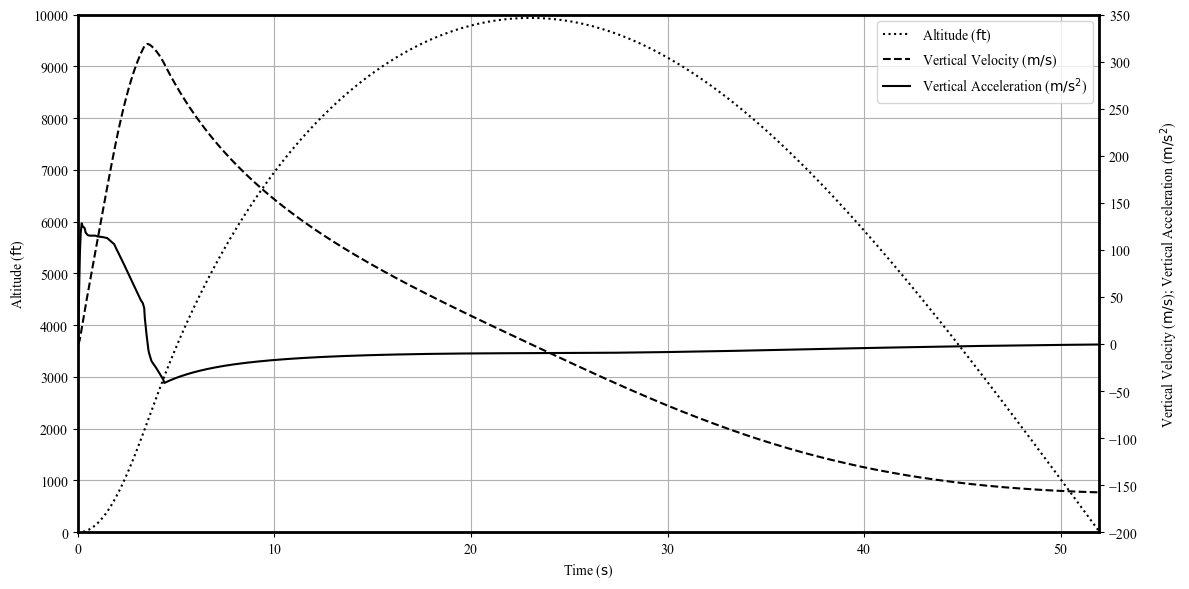

In [23]:
# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Altitude
ax1.plot(dh.ras_df["time"], dh.ras_df["altitude"],
         "k:", label="Altitude ($\mathrm{ft}$)")
ax1.set_xlabel(r"Time ($\mathrm{s}$)")
ax1.set_ylabel(r"Altitude ($\mathrm{ft}$)")
ax1.set_xlim(0, dh.ras_df["time"].max())
ax1.set_ylim(0, max_altitude)
ax1.set_yticks(range(0, max_altitude + 1, ALTITUDE_INCREMENTS))
# Set x-axis ticks at regular intervals
ax1.set_xticks(np.arange(0, dh.ras_df["time"].max(), 10))
ax1.grid(True)

# Plot Vertical velocity and acceleration
ax2 = ax1.twinx()
ax2.plot(
    dh.ras_df["time"],
    dh.ras_df["vertical_velocity"],
    "k--",
    label="Vertical Velocity ($\mathrm{m/s}$)",
)
ax2.plot(
    dh.ras_df["time"],
    dh.ras_df["vertical_acceleration"],
    "k-",
    label="Vertical Acceleration ($\mathrm{m/s^2}$)",
)
ax2.set_ylabel(
    "Vertical Velocity ($\mathrm{m/s}$); Vertical Acceleration ($\mathrm{m/s^2}$)", labelpad=15
)
ax2.set_ylim(min_vertical_motion, max_vertical_motion)
ax2.set_yticks(
    np.arange(
        min_vertical_motion,
        max_vertical_motion + 1,
        VERTICAL_MOTION_INCREMENTS,
    )
)

# Change spine properties to make the border darker and thicker
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    # Change the thickness. Adjust the value as needed.
    spine.set_linewidth(2)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

# plt.title(FLIGHT_PROFILE_PLOT_TITLE)
fig.tight_layout()

# # Plot event markers
# self.plot_event_markers(ax1)

plt.show()

## Flight Profile till Apogee

In [24]:
temp_ras_df = dh.ras_df.copy(deep=True)
temp_ras_df = temp_ras_df[temp_ras_df["time"]
                        <= APOGEE_TIME]

max_altitude = dh.round_to_increment(
    dh.ras_df["altitude"], ALTITUDE_INCREMENTS, 'up')
max_vertical_motion = dh.round_to_increment(
    dh.ras_df[VERTICAL_MOTION_COLUMNS].max(), VERTICAL_MOTION_INCREMENTS, 'up')
min_vertical_motion = dh.round_to_increment(
    dh.ras_df[VERTICAL_MOTION_COLUMNS].min(), VERTICAL_MOTION_INCREMENTS, 'down')

print(APOGEE_TIME)
print(max_altitude)
print(max_vertical_motion)
print(min_vertical_motion)

display(temp_ras_df)

23.02043
10000
350
-200


,time,stage,stage_time,mach_number,angle_of_attack,drag_coefficient,lift_coefficient,thrust_imperial,weight_imperial,drag_force_imperial,...,lift_force,cg_location,cp_location,total_acceleration,vertical_acceleration,horizontal_acceleration,total_velocity,vertical_velocity,horizontal_velocity,stability_margin_percentage
0,0.00000,S,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,30.94450,0.000000,...,0.000000,1761.299500,2138.433112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,13.186490
1,0.01000,S,0.01000,0.010000,0.00000,0.40241,0.000000,32.22412,30.94450,0.000000,...,0.000000,1760.880400,2138.433112,0.405527,0.405527,0.000018,2.000471,0.004055,1.782359e-07,13.201144
2,0.02000,S,0.02000,0.010000,0.00000,0.40241,0.000000,64.44825,30.94371,0.004088,...,0.000000,1760.461554,2138.433112,10.616917,10.616917,0.000036,2.003502,0.110224,5.346942e-07,13.215789
3,0.03000,S,0.03000,0.010000,0.00000,0.40241,0.000000,96.67237,30.94132,0.004100,...,0.000000,1760.042454,2138.433112,20.831696,20.831696,0.000053,2.025670,0.318541,1.069434e-06,13.230443
4,0.04000,S,0.04000,0.010000,0.00000,0.40241,0.000000,128.89650,30.93735,0.004191,...,0.000000,1759.623862,2138.433112,31.050123,31.050123,0.000071,2.097038,0.629043,1.782519e-06,13.245079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,22.98043,S,22.98043,0.010211,65.63450,11.12168,3.045869,0.00000,24.94350,0.238484,...,29.369502,1576.966112,2138.433112,-9.817267,-9.816791,-0.096682,3.338141,0.414017,1.311900e+00,19.631713
2299,22.99043,S,22.99043,0.010167,67.25562,11.57537,2.599868,0.00000,24.94350,0.246063,...,24.893074,1576.966112,2138.433112,-9.815527,-9.815029,-0.098795,3.326410,0.315867,1.310912e+00,19.631713
2300,23.00043,S,23.00043,0.010131,68.88672,12.03931,2.071230,0.00000,24.94350,0.254130,...,19.725631,1576.966112,2138.433112,-9.813850,-9.813329,-0.101159,3.317520,0.217734,1.309901e+00,19.631713
2301,23.01043,S,23.01043,0.010104,70.52502,12.51407,1.439689,0.00000,24.94350,0.262741,...,13.661271,1576.966112,2138.433112,-9.812400,-9.811850,-0.103848,3.311490,0.119615,1.308862e+00,19.631713


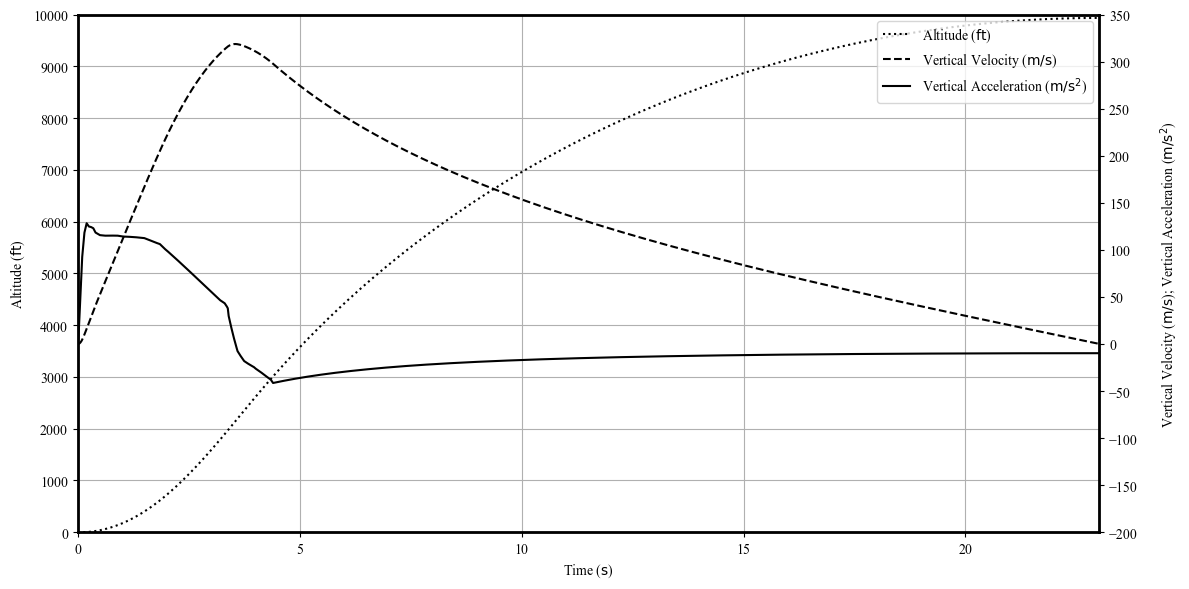

In [25]:
# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Altitude
ax1.plot(temp_ras_df["time"], temp_ras_df["altitude"],
         "k:", label="Altitude ($\mathrm{ft}$)")
ax1.set_xlabel(r"Time ($\mathrm{s}$)")
ax1.set_ylabel(r"Altitude ($\mathrm{ft}$)")
ax1.set_xlim(0, APOGEE_TIME)
ax1.set_ylim(0, max_altitude)
ax1.set_yticks(range(0, max_altitude + 1, ALTITUDE_INCREMENTS))
# Set x-axis ticks at regular intervals
ax1.set_xticks(np.arange(0, APOGEE_TIME, 5))
ax1.grid(True)

# Plot Vertical velocity and acceleration
ax2 = ax1.twinx()
ax2.plot(
    temp_ras_df["time"],
    temp_ras_df["vertical_velocity"],
    "k--",
    label="Vertical Velocity ($\mathrm{m/s}$)",
)
ax2.plot(
    temp_ras_df["time"],
    temp_ras_df["vertical_acceleration"],
    "k-",
    label="Vertical Acceleration ($\mathrm{m/s^2}$)",
)
ax2.set_ylabel(
    "Vertical Velocity ($\mathrm{m/s}$); Vertical Acceleration ($\mathrm{m/s^2}$)", labelpad=15
)
ax2.set_ylim(min_vertical_motion, max_vertical_motion)
ax2.set_yticks(
    np.arange(
        min_vertical_motion,
        max_vertical_motion + 1,
        VERTICAL_MOTION_INCREMENTS,
    )
)

# Change spine properties to make the border darker and thicker
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    # Change the thickness. Adjust the value as needed.
    spine.set_linewidth(2)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

# plt.title(FLIGHT_PROFILE_PLOT_TITLE)
fig.tight_layout()

# # Plot event markers
# self.plot_event_markers(ax1)

plt.show()